# Name:Panasa Nagaraju

# Task-1: Prediction Using Supervised ML

# ***PROBLEM STATEMENT***

***PREDICTION OF STUDENTS' PERCENTAGE BASED ON THEIR NUMBER OF STUDY HOURS.***

This is a simple linear regression task as it involves just 2 variables.
In this regression task we will predict the percentage of the marks that a student is expected to score based upon the number of hours they studied.




**IMPORT THE Libraries**

In [1]:
#IMPORT ALL THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**IMPORTING THE DATA**

In [2]:
#Reading the data from the remote link
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
print("IMPORTED DATA")
data


IMPORTED DATA


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#find the number of rows and columns 
data.shape

(25, 2)

In [5]:
#display the columns of the data
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#Checking the datatypes of the collumns in the dataset
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#checking the data included in the dataset
data.head() #gives only first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#check,if there are any missing values in the dataset
data.isnull().sum().sort_values(ascending=False)

Hours     0
Scores    0
dtype: int64

In [9]:
#checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#checking the statstical values of dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**DATA VISUALIZATION**

<AxesSubplot:>

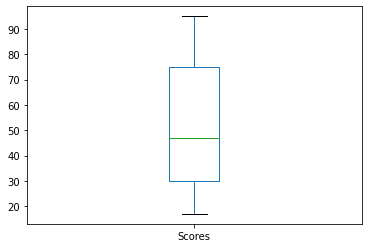

In [11]:
data.Scores.plot(kind='box')
#NO OUTLIERS IN DEPENDENT COLUMN(Scores)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


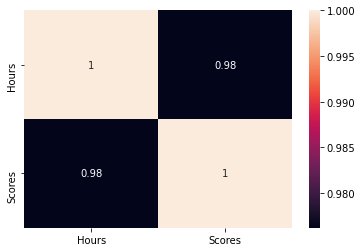

In [12]:
corrMatrix= data.corr()   #finding correlation between the columns in the data
print(corrMatrix)
sns.heatmap(corrMatrix,annot=True)
plt.show()

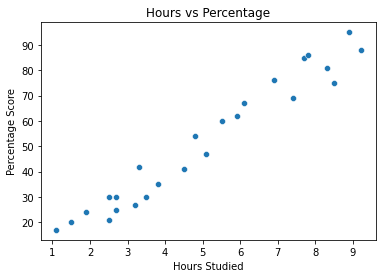

In [13]:
# Plotting the distribution of scores
sns.scatterplot(x='Hours', y='Scores', data=data)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


###From the above plot we see that there is a positive relationship between number of hours studied and percentage score.




**SPLITTING  THE DATA**

In [14]:
x=data['Hours']
y=data['Scores']

In [15]:
X = data.iloc[:, :-1].values

In [16]:
y = data.iloc[:, 1].values  

In [17]:
#SPLITTING THE DATA INTO TRAIN DATA AND TEST DATA
from sklearn.model_selection import train_test_split  


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

#***MODEL BUILDING USING LINEAR REGRESSION***

In [20]:
from sklearn.linear_model import LinearRegression 

In [21]:
reg = LinearRegression()  

In [22]:
#model fitting
regmodel=reg.fit(Xtrain,Ytrain)

In [23]:
#intercept
regmodel.intercept_

2.018160041434683

In [24]:
predicttrain=reg.predict(Xtrain)

In [25]:
print(list(zip(Xtrain,regmodel.coef_)))

[(array([3.8]), 9.910656480642237)]


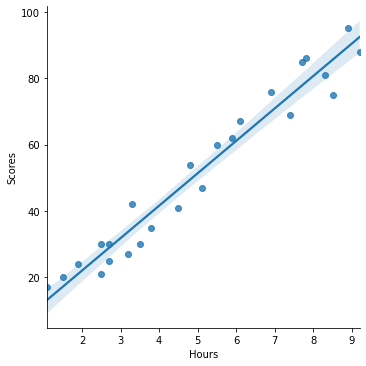

In [26]:
# Plotting the regression line
sns.lmplot(x='Hours',y='Scores',data=data) 

In [27]:
Xtest

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [28]:
#predict test data using regression model
testpredict=reg.predict(Xtest)

In [29]:
#comparing actual output and predicted output
comparingdata = pd.DataFrame({'Actual': Ytest, 'Predicted': testpredict})  

In [30]:
comparingdata

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
regresidual=Ytest-testpredict  

In [32]:
regresidual


array([ 3.11585524, -6.73226078, -6.357018  ,  3.20519876,  1.50896672])

In [33]:
hours =[9.25]
hrs=np.array(hours)
h=hrs.reshape(1,-1)
prediction=reg.predict(h)
print("No of Hours Studied by the Student  = {}".format(hrs))
print("Predicted Score of the student = {}".format(prediction))

No of Hours Studied by the Student  = [9.25]
Predicted Score of the student = [93.69173249]


*##Here we have to predict score if student study for 9.25 hrs in a day*

In [34]:

hours = float(input('Enter the no of hours:'))
pred=regmodel.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Enter the no of hours:9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


#**Evaluating the Model Accuracy**

Using Mean Square Error and R-square

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
#Evaluation metrics
print('MAE:', mean_absolute_error(predicttrain,Ytrain))
print('MSE:', mean_squared_error(predicttrain,Ytrain))
print('RMSE:', np.sqrt(mean_squared_error(predicttrain,Ytrain)))

MAE: 5.186601709180368
MSE: 30.89818237731452
RMSE: 5.558613350226342


<AxesSubplot:>

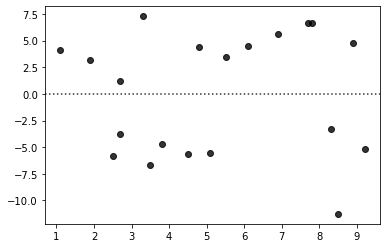

In [37]:
sns.residplot(x=Xtrain,y=Ytrain,color='black')

In [38]:
#R-square value
from scipy import stats
slope,intercept,r,p,std_err=stats.linregress(Ytest,testpredict)
print('R-squared Value:',r)


R-squared Value: 0.9806835759589493
